# Thin Film Limit

We compute here the analytical solution to the unperturbed Green's function in the MTI for the thin-film limit.

In [10]:
import numpy as np

from MTI_Analytical import parameters
from MTI_Differential_Equation import GMTI_NeumannBC


# define non-homogeneity alpha and c_i coefficients
def coefficients(spin, L, omega, C0 = -0.0068, D1 = 1.3, A1 = 2.2, M0 = 0.28, B1 = 10, hbar = 1.):

    # get coefficients lambda_i, gamma_i
    l1, l2, g1, g2 = parameters(spin=spin, L=L, omega=omega, C0=C0, D1=D1, A1=A1, M0=M0, B1=B1, hbar=hbar)

    # compute c_1+
    c1plus = 1./(g2*l2) * (g2*l2 - g1*l1)
    # compute c_2+
    c2plus = l1/(2*g2) * (g2*l1 - g1*l2)
    
    # compute c_1-
    c1minus = 1./l2 * (g1*l2 - g2*l1)
    # compute c_2-
    c2minus = l1/2 * (g1*l1 - g2*l2)

    # compute non-homogeneity
    aplus = hbar/(B1-D1); aminus = -hbar/(B1+D1)

    return c1plus, c2plus, c1minus, c2minus, aplus, aminus



def GMTI_ThinFilm(d, z, Z, L, omega, C0 = -0.0068, D1 = 1.3, A1 = 2.2, M0 = 0.28, B1 = 10, hbar = 1.):

    g = []
    for spin in ['up', 'down']:

        c1plus, c2plus, c1minus, c2minus, aplus, aminus = coefficients(spin=spin, L=L, omega=omega, C0=C0, D1=D1, A1=A1, M0=M0, B1=B1, hbar=hbar)
    
        # plus components
        c1=c1plus; c2=c2plus; a=aplus
        
        if z <= Z:
            gpp = a/(2*d) * (c1+c2*z**2)*(c1+c2*(Z-d)**2) / ( c2*(c1-c2*Z*(Z-d)) )
        else:
            gpp = a/(2*d) * (c1+c2*(z-d)**2)*(c1+c2*Z**2) / ( c2*(c1-c2*Z*(Z-d)) )
         
        g.append(gpp)
        
        # minus components
        c1=c1minus; c2=c2minus; a=aminus

        if z <= Z:
            gmm = a/(2*d) * (c1+c2*z**2)*(c1+c2*(Z-d)**2) / ( c2*(c1-c2*Z*(Z-d)) )
        else:
            gmm = a/(2*d) * (c1+c2*(z-d)**2)*(c1+c2*Z**2) / ( c2*(c1-c2*Z*(Z-d)) )
        
        g.append(gmm)

    
    return np.array(g)



# parameters
L = 0.010; w = 0.005; d = 25.; zp = 12
# lattice
lattice = np.linspace(0, d, 100)

# full solution
Gfull = np.array([GMTI_NeumannBC(d=d, z=z, Z=zp, kx=0., ky=0., L=L, w=w) for z in lattice])
# analytical approximation
Ganalytical = np.array([GMTI_ThinFilm(d=d, z=z, Z=zp, L=L, omega=w) for z in lattice])

### <font color='black'> Comparison </font> 

We compare the analytical solution obtained in the thin film limit with the full solution.

#### <font color='green'> **Real Part** </font> 

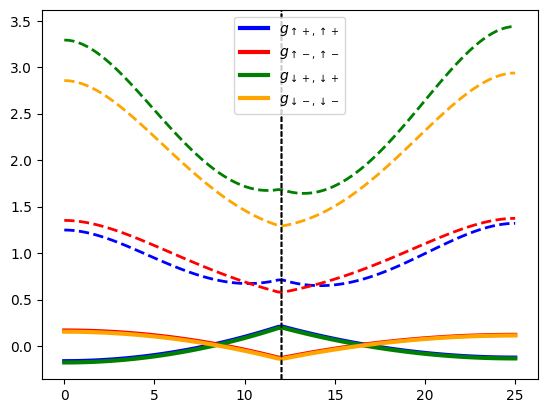

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# colors
colors = ['blue', 'red', 'green', 'orange']
# labels for curves
labels = ["$g_{\\uparrow +, \\uparrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\downarrow -, \downarrow -}$"]


# subplots
fig, ax = plt.subplots(1,1)

for idx in range(4):

    # analytical approximation thin film limit
    ax.plot(lattice, Ganalytical[:,idx].real, lw=3, label=labels[idx], c=colors[idx])
    
    # full result
    if idx == 1: i = 2    
    elif idx == 2: i = 1
    else: i = idx
    ax.plot(lattice, Gfull[:,i,i].real, lw=2, ls='--', c=colors[idx])

    ax.axvline(x=zp, c='black', ls='--', lw=1)

ax.legend();